### ACTIVIDAD 2: REGRESION LINEAL MÚLTIPLE

### DATA IMPORT

In [ ]:
import pandas as pd
moons = pd.read_excel('C:/Users/Rodrigo/Desktop/Master_Big_Data/Fundamentos del estudio de análisis de datos/3.- Actividad 2/Jupyter_moons.xlsx')

moons.dtypes
moons.head()

,Name,Mass_log,Major_axis,Period,Inclination,Eccentricity,Discovery_year,Group
0,S/2003 J 2,13.00000,30290846,-1077.02,153.521,0.1882,2003,*?*
1,Carpo,13.60206,17144873,458.62,56.001,0.2735,2003,*Carpo*
2,S/2003 J 12,13.00000,17739539,-482.69,142.680,0.4449,2003,*?*
3,Euporie,13.00000,19088434,-538.78,144.694,0.0960,2002,Ananke
4,S/2003 J 3,13.00000,19621780,-561.52,146.363,0.2507,2003,Ananke


### DATA EXPLORATION

In [ ]:
moons.dtypes

Name               object
Mass_log          float64
Major_axis          int64
Period            float64
Inclination       float64
Eccentricity      float64
Discovery_year      int64
Group              object
dtype: object

In [ ]:
moons.tail()

,Name,Mass_log,Major_axis,Period,Inclination,Eccentricity,Discovery_year,Group
62,Thebe,17.633468,221889,16.160,1.076,0.0175,1979,Inner
63,Io,22.950944,421700,1.769,0.050,0.0041,1610,Galilean
64,Europa,22.681241,671034,3.551,0.471,0.0094,1610,Galilean
65,Ganymede,23.170819,1070412,7.154,0.204,0.0011,1610,Galilean
66,Callisto,23.031772,1882709,16.689,0.205,0.0074,1610,Galilean


In [ ]:
moons[['Name', 'Mass_log']]
moons.Name
moons.iloc[0]
moons.iloc[[0,1,2],[1,2,3]]
moons.iloc[0:2,1:3]
moons.loc[0:4,['Name','Mass_log','Inclination']]
moons['Major_axis']>60000
moons.loc[moons['Major_axis']<1000000]

,Name,Mass_log,Major_axis,Period,Inclination,Eccentricity,Discovery_year,Group
59,Metis,16.556303,127690,7.070,0.060,0.0000,1979,Inner
60,Adrastea,15.301030,128690,7.170,0.030,0.0015,1979,Inner
61,Amalthea,18.318063,181366,11.950,0.374,0.0032,1892,Inner
62,Thebe,17.633468,221889,16.160,1.076,0.0175,1979,Inner
63,Io,22.950944,421700,1.769,0.050,0.0041,1610,Galilean
64,Europa,22.681241,671034,3.551,0.471,0.0094,1610,Galilean


In [ ]:
print(moons.ndim, '\n')
print(moons.shape, '\n')
print(moons.size, '\n')
print(moons.columns, '\n')
print(moons.index, '\n')
print(moons.dtypes, '\n')

2 

(67, 8) 

536 

Index(['Name', 'Mass_log', 'Major_axis', 'Period', 'Inclination',
       'Eccentricity', 'Discovery_year', 'Group'],
      dtype='object') 

RangeIndex(start=0, stop=67, step=1) 

Name               object
Mass_log          float64
Major_axis          int64
Period            float64
Inclination       float64
Eccentricity      float64
Discovery_year      int64
Group              object
dtype: object 



In [ ]:
moons.describe()

,Mass_log,Major_axis,Period,Inclination,Eccentricity,Discovery_year
count,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000
mean,14.702140,1.871731e+07,-505.478612,123.314627,0.240582,1967.492537
std,2.592736,7.694167e+06,359.679397,59.056269,0.125851,95.090925
min,13.000000,1.276900e+05,-1077.020000,0.030000,0.000000,1610.000000
25%,13.000000,1.935511e+07,-727.020000,139.998500,0.180750,1989.500000
50%,13.845098,2.213431e+07,-672.750000,149.732000,0.250700,2002.000000
75%,14.889184,2.331083e+07,-550.150000,163.000000,0.317650,2003.000000
max,23.170819,3.029085e+07,458.620000,167.070000,0.601100,2011.000000


In [ ]:
moons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            67 non-null     object 
 1   Mass_log        67 non-null     float64
 2   Major_axis      67 non-null     int64  
 3   Period          67 non-null     float64
 4   Inclination     67 non-null     float64
 5   Eccentricity    67 non-null     float64
 6   Discovery_year  67 non-null     int64  
 7   Group           67 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ KB


In [ ]:
moons['Major_axis'].mode()

0       127690
1       128690
2       181366
3       221889
4       421700
        ...   
62    24057865
63    24252627
64    24264445
65    24687239
66    30290846
Length: 67, dtype: int64

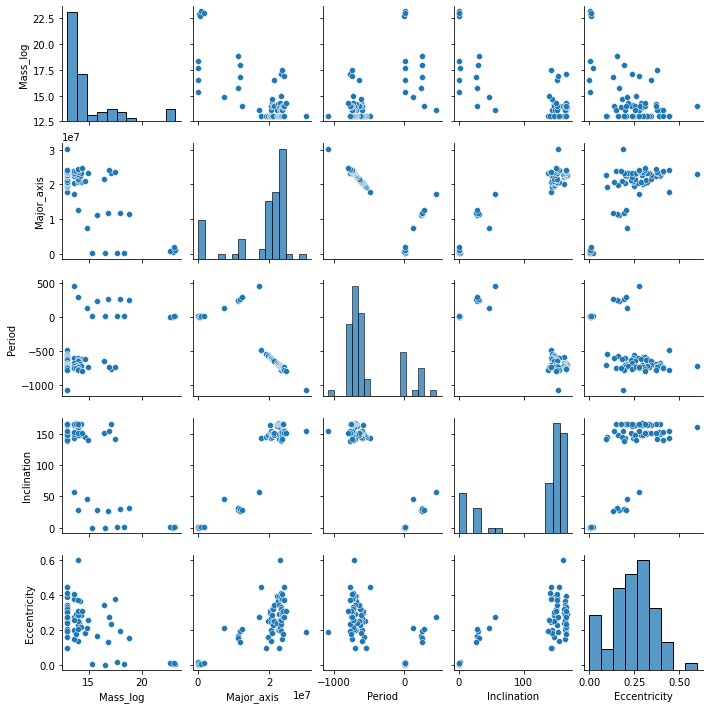

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns

attributes = ["Mass_log", "Major_axis", "Period", "Inclination", "Eccentricity"]
#scatter_matrix(moons[attributes], figsize=(12, 8))

sns.pairplot(moons[attributes], height=2);

### PARAMETERIZED DATA

## MULTIPLE LINEAR REGRESSION: ROW DATA

In [ ]:
# Data preparation
X_multiple_1 = moons[['Mass_log','Period','Inclination','Eccentricity','Discovery_year']]
y_multiple_1 = moons[['Major_axis']]

In [ ]:
# Library import 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
np.random.seed(42)

In [ ]:
# Model fit
np.random.seed(42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_multiple_1, y_multiple_1, test_size=0.2)
lr_multiple_1 = linear_model.LinearRegression()
lr_multiple_1.fit(X_train_1, y_train_1)

Y_pred_multiple_1 = lr_multiple_1.predict(X_test_1)

lin_mse_1  = mean_squared_error(y_test_1, Y_pred_multiple_1)
lin_rmse_1 = np.sqrt(lin_mse_1)
lin_mae_1  = mean_absolute_error(y_test_1, Y_pred_multiple_1)

print(lr_multiple_1.score(X_train_1, y_train_1))

print (lin_rmse_1, "\n", lin_mae_1)
print (lr_multiple_1.coef_, lr_multiple_1.intercept_)

0.9151906672965987
3380817.1784447613 
 2216978.34365428
[[4.38655355e+05 4.24492298e+03 1.31442591e+05 6.13528065e+06
  1.47599757e+04]] [-32330694.54110426]


In [ ]:
import statsmodels.api as sm
x = sm.add_constant(X_train_1)
model = sm.OLS(y_train_1, x).fit()
model.params
model.tvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Major_axis   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.37e-24
Time:                        18:20:28   Log-Likelihood:                -845.61
No. Observations:                  53   AIC:                             1703.
Df Residuals:                      47   BIC:                             1715.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.233e+07    2.3e+07     -1.408      0.166   -7.85e+07    1.39e+07
Mass_log        4.387e+05   3.71e+05      1.182      0.243   -3.08e+05    1.19e+06
Period          4244.9230   2548.824      1.665      0.102    -882.649    9372.495
Inclination     1.314e+05   2.05e+04      6.399      0.000    9.01e+04    1.73e+05
Eccentricity    6.135e+06   3.41e+06      1.799      0.078   -7.25e+05     1.3e+07
Discovery_year  1.476e+04   9108.381      1.620      0.112   -3563.723    3.31e+04
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.400
Skew:                          -0.178   Prob(JB):                        0.819
Kurtosis:                       2.766   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## MULTIPLE LINEAR REGRESSION 2: NORMALIZED

In [ ]:
# Normalizado de categorías asigna valor 0 o 1
from sklearn.preprocessing import OneHotEncoder

moons_cat = moons[["Name", "Group"]]
cat_encoder = OneHotEncoder(sparse=False)
moons_cat_1hot = cat_encoder.fit_transform(moons_cat)
#cat_encoder.categories_

In [ ]:
#Normalizado de datos numericos con la media y desviación estándar 
from sklearn.preprocessing import StandardScaler

Period_abs = []
for i in moons['Period']:
        Period_abs.append(abs(i))
    
moons['Period'] = Period_abs
moons_num = moons.iloc[:,1:6]
num_std   = StandardScaler()
moons_std = num_std.fit_transform(moons_num) 
moons_std_df = pd.DataFrame(moons_std, columns=['Mass_log','Major_axis','Period','Inclination','Eccentricity'])

print(moons_std_df)

    Mass_log  Major_axis    Period  Inclination  Eccentricity
0  -0.661458    1.515549  2.012931     0.515345     -0.419364
1  -0.427496   -0.205910 -0.412917    -1.148424      0.263536
2  -0.661458   -0.128039 -0.318496     0.330389      1.635742
3  -0.661458    0.048598 -0.098467     0.364749     -1.157505
4  -0.661458    0.118440 -0.009263     0.393224      0.081003
..       ...         ...       ...          ...           ...
62  1.139126   -2.421966 -2.148591    -2.085489     -1.785966
63  3.205518   -2.395801 -2.205044    -2.102993     -1.893244
64  3.100710   -2.363151 -2.198054    -2.095811     -1.850813
65  3.290962   -2.310853 -2.183920    -2.100366     -1.917262
66  3.236928   -2.204483 -2.146516    -2.100349     -1.866825

[67 rows x 5 columns]


In [ ]:
# Model frit
np.random.seed(42)
X_multiple_2 = moons_std_df[['Mass_log','Period','Inclination','Eccentricity']]
y_multiple_2 = moons_std_df[['Major_axis']]



# Model fit
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_multiple_2, y_multiple_2, test_size=0.2)
lr_multiple_2 = linear_model.LinearRegression()
lr_multiple_2.fit(X_train_2, y_train_2)

Y_pred_multiple_2 = lr_multiple_2.predict(X_test_2)

lin_mse_2  = mean_squared_error(y_test_2, Y_pred_multiple_2)
lin_rmse_2 = np.sqrt(lin_mse_2)
lin_mae_2  = mean_absolute_error(y_test_2, Y_pred_multiple_2)

print(lr_multiple_2.score(X_train_2, y_train_2))

print (round(lin_rmse_2,4), "\n", round(lin_mae_2,4))
print (lr_multiple_2.coef_, lr_multiple_2.intercept_)
#X_train_2.to_excel('Moons_entrenamiento.xlsx', engine='xlsxwriter')
#y_train_2.to_excel('Moons_eje_entrenamiento.xlsx', engine='xlsxwriter')
#X_test_2.to_excel('Moons_test.xlsx', engine='xlsxwriter')
#y_test_2.to_excel('Moons_eje_test.xlsx', engine='xlsxwriter')

0.983225682535757
0.1771 
 0.1272
[[-0.06443914  0.92620363 -0.0290173   0.04400695]] [0.01629352]


In [ ]:
x = sm.add_constant(X_train_2)
model = sm.OLS(y_train_2, x).fit()
model.params
model.tvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Major_axis   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     703.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           6.06e-42
Time:                        18:20:28   Log-Likelihood:                 37.304
No. Observations:                  53   AIC:                            -64.61
Df Residuals:                      48   BIC:                            -54.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0163      0.017      0.940      0.352      -0.019       0.051
Mass_log        -0.0644      0.026     -2.526      0.015      -0.116      -0.013
Period           0.9262      0.062     15.034      0.000       0.802       1.050
Inclination     -0.0290      0.059     -0.495      0.623      -0.147       0.089
Eccentricity     0.0440      0.025      1.796      0.079      -0.005       0.093
==============================================================================
Omnibus:                       10.903   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.732
Skew:                          -0.726   Prob(JB):                      0.00104
Kurtosis:                       5.027   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MULTIPLE LINEAR REGRESSION 3: NORMALIZED + FEATURES REDUCTION

In [ ]:
# Model frit
np.random.seed(42)
X_multiple_3 = moons_std_df[['Mass_log','Inclination', 'Eccentricity']]
y_multiple_3 = moons_std_df[['Major_axis']]

# Model fit
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_multiple_3, y_multiple_3, test_size=0.2)
lr_multiple_3 = linear_model.LinearRegression()
lr_multiple_3.fit(X_train_3, y_train_3)

Y_pred_multiple_3 = lr_multiple_3.predict(X_test_3)

lin_mse_3  = mean_squared_error(y_test_3, Y_pred_multiple_3)
lin_rmse_3 = np.sqrt(lin_mse_3)
lin_mae_3  = mean_absolute_error(y_test_3, Y_pred_multiple_3)

print(lr_multiple_3.score(X_train_3, y_train_3))

print (round(lin_rmse_3,4), "\n", round(lin_mae_3,4))
print (lr_multiple_3.coef_, lr_multiple_3.intercept_)

0.9042439060894668
0.3915 
 0.2661
[[-0.07987437  0.74387324  0.13346816]] [0.01139071]


In [ ]:
x = sm.add_constant(X_train_3)
model = sm.OLS(y_train_3, x).fit()
model.params
model.tvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Major_axis   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.90e-25
Time:                        18:20:28   Log-Likelihood:                -8.8581
No. Observations:                  53   AIC:                             25.72
Df Residuals:                      49   BIC:                             33.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0114      0.041      0.278      0.782      -0.071       0.094
Mass_log        -0.0799      0.060     -1.325      0.191      -0.201       0.041
Inclination      0.7439      0.067     11.149      0.000       0.610       0.878
Eccentricity     0.1335      0.056      2.374      0.022       0.020       0.246
==============================================================================
Omnibus:                        0.346   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.515
Skew:                          -0.138   Prob(JB):                        0.773
Kurtosis:                       2.603   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MULTIPLE LINEAR REGRESSION 4: NORMALIZED + FEATURES REDUCTION

In [ ]:
# Model preparation
np.random.seed(42)
X_multiple_4 = moons_std_df[['Eccentricity','Inclination']]
y_multiple_4 = moons_std_df[['Major_axis']]

# Model fit
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_multiple_4, y_multiple_4, test_size=0.2)
lr_multiple_4 = linear_model.LinearRegression()
lr_multiple_4.fit(X_train_4, y_train_4)

Y_pred_multiple_4 = lr_multiple_4.predict(X_test_4)

lin_mse_4  = mean_squared_error(y_test_4, Y_pred_multiple_4)
lin_rmse_4 = np.sqrt(lin_mse_4)
lin_mae_4  = mean_absolute_error(y_test_4, Y_pred_multiple_4)

print(lr_multiple_4.score(X_train_4, y_train_4))

print (round(lin_rmse_4,4), "\n", round(lin_mae_4,4))
print (lr_multiple_4.coef_, lr_multiple_4.intercept_)

0.9008110603483863
0.3967 
 0.2656
[[0.14417099 0.79448106]] [0.00866293]


In [ ]:
import statsmodels.api as sm
x = sm.add_constant(X_train_4)
model = sm.OLS(y_train_4, x).fit()
model.params
model.tvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Major_axis   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     227.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           8.16e-26
Time:                        18:20:28   Log-Likelihood:                -9.7915
No. Observations:                  53   AIC:                             25.58
Df Residuals:                      50   BIC:                             31.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0087      0.041      0.210      0.834      -0.074       0.091
Eccentricity     0.1442      0.056      2.572      0.013       0.032       0.257
Inclination      0.7945      0.055     14.412      0.000       0.684       0.905
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.447
Skew:                           0.079   Prob(JB):                        0.800
Kurtosis:                       2.578   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_4 = sm.add_constant(X_test_4, prepend=True)
predicciones = model.predict(exog = x_4)
rmse = mean_squared_error(
        y_true  = y_test_4,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.3967397577839354


## MULTIPLE LINEAR REGRESSION 5: NORMALIZED + NO OUTLIERS

In [ ]:
# Model preparation
np.random.seed(42)
X_multiple_5 = moons_std_df.loc[0:62, ['Mass_log', 'Eccentricity', 'Inclination']]
y_multiple_5 = moons_std_df.loc[0:62, ['Major_axis']]

# Model fit
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_multiple_5, y_multiple_5, test_size=0.2)
lr_multiple_5 = linear_model.LinearRegression()
lr_multiple_5.fit(X_train_5, y_train_5)

Y_pred_multiple_5 = lr_multiple_5.predict(X_test_5)

lin_mse_5  = mean_squared_error(y_test_5, Y_pred_multiple_5)
lin_rmse_5 = np.sqrt(lin_mse_5)
lin_mae_5  = mean_absolute_error(y_test_5, Y_pred_multiple_5)

print(lr_multiple_5.score(X_train_5, y_train_5))

print (round(lin_rmse_5,4), "\n", round(lin_mae_5,4))
print (lr_multiple_5.coef_, lr_multiple_5.intercept_)

In [ ]:
x = sm.add_constant(X_train_5)
model = sm.OLS(y_train_5, x).fit()
model.params
model.tvalues
model.summary()

In [ ]:
moons_no_outliers = moons_std_df.loc[:, ['Mass_log', 'Eccentricity', 'Inclination', 'Major_axis']]
moons_no_outliers.describe()

### POLINOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import matplotlib.pyplot as plt

# Data preparation
X_rpoly = moons_std_df.loc[:, ['Major_axis']]
y_rpoly = moons_std_df.loc[:, ['Period']]

# Model fit
np.random.seed(42)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_rpoly, y_rpoly, test_size=0.2)

poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train_poly)
X_test_poly  = poly_reg.fit_transform(X_test_poly)

pr = linear_model.LinearRegression()
pr.fit(X_train_poly, y_train_poly)

Y_pred_pr = pr.predict(X_test_poly)


lin_mse_p  = mean_squared_error(y_test_poly, Y_pred_pr)
lin_rmse_p = np.sqrt(lin_mse_p)
lin_mae_p  = mean_absolute_error(y_test_poly, Y_pred_pr)

print(pr.score(X_train_poly, y_train_poly))

print('R2' + '   ' + str(round(pr.score(X_train_poly, y_train_poly),4)))
print ('RMSE'+ ' ' + str(round(lin_rmse_p,4)) + "\n" + 'MAE'+ '  ' + str(round(lin_mae_p,4)))
print (pr.coef_, pr.intercept_)


x = np.linspace(-2.5,1.8,200).reshape(-1, 1)
X_plot = poly_reg.fit_transform(x)
y = pr.predict(X_plot)

plt.figure(1, figsize=(10,6))
plt.scatter(X_rpoly, y_rpoly, s=10)
plt.plot(x,y,'--r',  linewidth=1)
plt.xlabel('Major axis (std)')
plt.ylabel('Period (std)')
plt.title('MAJOR AXIS - PERIOD (std)')
plt.show()

In [ ]:
x = sm.add_constant(X_train_poly)
model = sm.OLS(y_train_poly, x).fit()
model.params
model.tvalues
model.summary()

In [ ]:
# Model preparation
np.random.seed(42)
X_multiple_6 = moons_std_df[['Major_axis']]
y_multiple_6 = moons_std_df[['Period']]

# Model fit
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_multiple_6, y_multiple_6, test_size=0.2)
lr_multiple_6 = linear_model.LinearRegression()
lr_multiple_6.fit(X_train_6, y_train_6)

Y_pred_multiple_6 = lr_multiple_6.predict(X_test_6)

lin_mse_6  = mean_squared_error(y_test_6, Y_pred_multiple_6)
lin_rmse_6 = np.sqrt(lin_mse_6)
lin_mae_6  = mean_absolute_error(y_test_6, Y_pred_multiple_6)

print(lr_multiple_6.score(X_train_6, y_train_6))

print (round(lin_rmse_6,4), "\n", round(lin_mae_6,4))
print (lr_multiple_6.coef_, lr_multiple_6.intercept_)


x_2 = np.linspace(-2.5,1.8,200).reshape(-1, 1)
y_2 = lr_multiple_6.predict(x_2)

plt.figure(1, figsize=(10,6))
plt.scatter(X_multiple_6, y_multiple_6, s=10)
plt.plot(x_2,y_2,'--g',  linewidth=1)
plt.plot(x,y,'--r',  linewidth=1)
plt.xlabel('Major axis (std)')
plt.ylabel('Period (std)')
plt.title('MAJOR AXIS - PERIOD (std)')
plt.savefig("Correlaciones lineal.jpg")
plt.show()

## VALIDACIÓN

In [ ]:
x_3 = Y_pred_multiple_4
X_plot_3 = poly_reg.fit_transform(Y_pred_multiple_4)
y_3 = pr.predict(X_plot_3)

print(y_3)
print(X_test_2['Period'])
#X_test_2['Period'] - y_3
#print((y_test_4 - Y_pred_multiple_4)/y_test_4*100)
#print(y_test_4, Y_pred_multiple_4)
#print (Y_pred_multiple_4.ndim)
#print (y_test_4.size)
print(X_test_2)

## REGRESIÓN LINEAL SIMPLE

In [ ]:
# Data preparation
np.random.seed(42)
X_multiple_7 = moons_std_df[['Mass_log' ,'Inclination', 'Eccentricity']]
y_multiple_7 = moons_std_df[['Major_axis']]

# Dta split
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_multiple_7, y_multiple_7, test_size=0.2)

print(X_train_7.shape)

## NN (KERAS)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [3]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="relu")
])

model.summary()

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=["accuracy"])



#model.compile(optimizer=RMSprop(lr=0.001),
#   loss='binary_crossentropy',
#   metrics = ['accuracy'])

#model.compile(loss="categorical_crossentropy", 
#                optimizer="sgd", 
#                metrics = ['accuracy'])

history = model.fit(X_train_7, y_train_7, epochs=100)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
scores = model.evaluate(X_train_7, y_train_7)
model.predict(X_test_7).round(4)